In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict


## JOINT ANGLE DATA
#orig action space
#sim_data = {'joint0_direction_1_true10': 0.11892182948681558, 'joint5_direction_1_true10': 0.23920723012990983, 'joint3_direction_0_true10': 0.19991827012742402, 'joint2_direction_1_true10': 0.200031445057021, 'joint1_direction_1_true10': 0.097246170581307245, 'joint0_direction_0_true10': 0.11878746664305258, 'joint6_direction_0_true10': 0.23996161828035559, 'joint6_direction_1_true10': 0.23996161055065132, 'joint2_direction_0_true10': 0.19905835722225998, 'joint4_direction_0_true10': 0.23711163130562357, 'joint4_direction_1_true10': 0.23711785450672621, 'joint1_direction_0_true10': 0.13531498794129745, 'joint5_direction_0_true10': 0.23921278142450877, 'joint3_direction_1_true10': 0.1985057932069263}
# [-5, 5] action space
#sim_data = {'joint5_direction_1_true10': 0.11960417968451856, 'joint5_direction_0_true10': 0.11960563033578139, 'joint3_direction_0_true10': 0.099760330836446753, 'joint4_direction_0_true10': 0.11855599309896769, 'joint0_direction_0_true10': 0.059428295347984814, 'joint1_direction_1_true10': 0.067312301480338621, 'joint6_direction_1_true10': 0.11998080596595355, 'joint2_direction_0_true10': 0.099656123476283123, 'joint4_direction_1_true10': 0.11855743877241502, 'joint2_direction_1_true10': 0.099899940769306889, 'joint6_direction_0_true10': 0.11998080793048535, 'joint0_direction_1_true10': 0.059462071752434342, 'joint3_direction_1_true10': 0.099405911660414015, 'joint1_direction_0_true10': 0.067551297934968835}
#real_data = {'joint6_direction_1_true2.25': -0.1117209929972887, 'joint1_direction_1_true1.875': -0.005793845653533936, 'joint4_direction_0_true2.25': 0.08229072447866201, 'joint1_direction_0_true1.875': 0.012440407276153564, 'joint3_direction_0_true3.75': 0.05540769100189209, 'joint0_direction_1_true2.625': -0.015602343901991843, 'joint0_direction_0_true2.625': 0.020290527597535402, 'joint6_direction_0_true2.25': 0.11847753860056401, 'joint4_direction_1_true2.25': -0.09064892455935478, 'joint2_direction_1_true3.75': -0.04573671817779541, 'joint3_direction_1_true3.75': -0.027840614318847656, 'joint2_direction_0_true3.75': 0.05435537174344063, 'joint5_direction_1_true1.5': -0.03956289291381836, 'joint5_direction_0_true1.5': 0.07845984697341919}
# smaller action space, trying to match joint angles of real
#sim_data = {'joint1_direction_0_true10': 0.013491969351200561, 'joint6_direction_1_true10': 0.11998080596595355, 'joint4_direction_1_true10': 0.094845766049834385, 'joint6_direction_0_true10': 0.11998080793048535, 'joint1_direction_1_true10': 0.013482404539061354, 'joint4_direction_0_true10': 0.094844849347288013, 'joint0_direction_0_true10': 0.023777369149343974, 'joint5_direction_1_true10': 0.071762666385460805, 'joint5_direction_0_true10': 0.071763193499130407, 'joint3_direction_1_true10': 0.0596830749237931, 'joint2_direction_0_true10': 0.059823604164767299, 'joint3_direction_0_true10': 0.059810765581512326, 'joint0_direction_1_true10': 0.023782781715049994, 'joint2_direction_1_true10': 0.05991141999288465}

## EE POSITION DATA
#### NOTE: this makes no sense since very likely the "EE" in real and sim is not on the same place on the robot
# original [-10, 10] action scale
#sim_data = {'joint2_direction_0_true': 0.0078281349715010884, 'joint2_direction_1_true': 0.024524459502010772, 'joint6_direction_0_true': 0.0024185040876303935, 'joint3_direction_0_true': 0.0020251448253714166, 'joint0_direction_1_true': 0.03141700175497944, 'joint5_direction_1_true': 0.031233004877620069, 'joint0_direction_0_true': 0.01942466132833702, 'joint4_direction_0_true': 0.0018196335582636655, 'joint4_direction_1_true': 0.017827395298866858, 'joint1_direction_1_true': 0.035954622621016355, 'joint1_direction_0_true': 0.047213074441729543, 'joint3_direction_1_true': 0.048655327921635891, 'joint6_direction_1_true': 0.0023425437976096696, 'joint5_direction_0_true': 0.0066420094530888416}
#tuned action scale
#sim_data = {'joint0_direction_0_true10': 0.033011069262635195, 'joint3_direction_0_true10': 0.098387564012513279, 'joint2_direction_1_true10': 0.065535706057880269, 'joint4_direction_1_true10': 0.054337373321976391, 'joint5_direction_0_true10': 0.036622102022209516, 'joint6_direction_1_true10': 8.878580307642117e-05, 'joint1_direction_1_true10': 0.020008756030648993, 'joint2_direction_0_true10': 0.067038780094077918, 'joint1_direction_0_true10': 0.020110419612641008, 'joint0_direction_1_true10': 0.033130515398571099, 'joint5_direction_1_true10': 0.037067981442894346, 'joint3_direction_1_true10': 0.10167209085698262, 'joint4_direction_0_true10': 0.053548646188672291, 'joint6_direction_0_true10': 9.8656981780135324e-05}
#sim_data = {'joint5_direction_0_true10': 0.045669254580502638, 'joint3_direction_1_true10': 0.10167209085698262, 'joint4_direction_0_true10': 0.035901060239908814, 'joint0_direction_0_true10': 0.054945644124244353, 'joint3_direction_0_true10': 0.098387564012513279, 'joint2_direction_0_true10': 0.084015702785703111, 'joint5_direction_1_true10': 0.04636299952990787, 'joint1_direction_1_true10': 0.044835658894748782, 'joint0_direction_1_true10': 0.055277435770199237, 'joint6_direction_0_true10': 9.8656981780135324e-05, 'joint6_direction_1_true10': 8.878580307642117e-05, 'joint2_direction_1_true10': 0.081672637798673758, 'joint1_direction_0_true10': 0.06742576242460116, 'joint4_direction_1_true10': 0.036252382414301454}
# tuned action ranges to match joint angles with real
sim_data = {'joint5_direction_0_true10': 0.013803759146944896, 'joint2_direction_0_true10': 0.024970528875750821, 'joint4_direction_1_true10': 0.014489727829070986, 'joint2_direction_1_true10': 0.024758403880153244, 'joint0_direction_1_true10': 0.011030879184681302, 'joint3_direction_0_true10': 0.029902500727254665, 'joint5_direction_1_true10': 0.013866866890690624, 'joint3_direction_1_true10': 0.030198978306106676, 'joint6_direction_1_true10': 4.5500596970493188e-05, 'joint4_direction_0_true10': 0.014433433980618252, 'joint1_direction_1_true10': 0.00668090730964981, 'joint6_direction_0_true10': 4.7987964155571015e-05, 'joint0_direction_0_true10': 0.01101760734573937, 'joint1_direction_0_true10': 0.0066922052785025749}
# real data from robot 
real_data = {'joint0_direction_0_true2.625': 0.03552098279590733, 'joint1_direction_1_true1.875': 0.008881036273732431, 'joint2_direction_1_true3.75': 0.05714817829666299, 'joint3_direction_1_true3.75': 0.053016762935346726, 'joint1_direction_0_true1.875': 0.020212687982871617, 'joint2_direction_0_true3.75': 0.07618756781420202, 'joint4_direction_1_true2.25': 0.05407977771316831, 'joint6_direction_1_true2.25': 0.0024313296006860906, 'joint3_direction_0_true3.75': 0.09636241918714186, 'joint0_direction_1_true2.625': 0.0238604340152198, 'joint5_direction_1_true1.5': 0.015129994652287801, 'joint5_direction_0_true1.5': 0.0390272451274138, 'joint4_direction_0_true2.25': 0.03772069379817248, 'joint6_direction_0_true2.25': 0.002517161069410529}

Compare joint angle and end-effector movement in sim and real robot

In [91]:
# order the joints and make keys match between sim and real
sim_ordered = OrderedDict()
real_ordered = OrderedDict()
for k in sorted(sim_data.keys()):
    short_k = k[:-7]
    real_k = [j for j in real_data.keys() if short_k in j][0]
    sim_ordered[short_k] = sim_data[k]
    real_ordered[short_k] = real_data[real_k]

# make sure diffs are positive
for k,v in real_ordered.items():
    real_ordered[k] = np.abs(v)
    
# make x-coords so that sim and real can be plotted side by side
num_data = len(sim_ordered.keys()) * 3
sim_x = list(np.linspace(num_data, 0, 14))
sim_x.reverse()
real_x = np.array(sim_x) + 1

# do the plotting (sim is blue, real is orange)
plt.bar(sim_x, list(sim_ordered.values()))
plt.bar(real_x, list(real_ordered.values()))
plt.xticks(sim_x, list(sim_ordered.keys()), rotation='vertical')

### Analyze real world data

In [ ]:
import pickle

with open('real_torque_joint_data.pkl', 'rb') as f:
    data = pickle.load(f)
    
# each key is for a different joint moving
#for k in data.keys():
    # each entry is for each of 10 runs
    # for each run, there are 16 timesteps (incl initial one)
    # for each timestep, there are 7 torque values, and 7 joint angle values
    #print(data[k][0][0])
    #break

Q1: what is the variance across runs - how repeatable is the robot?

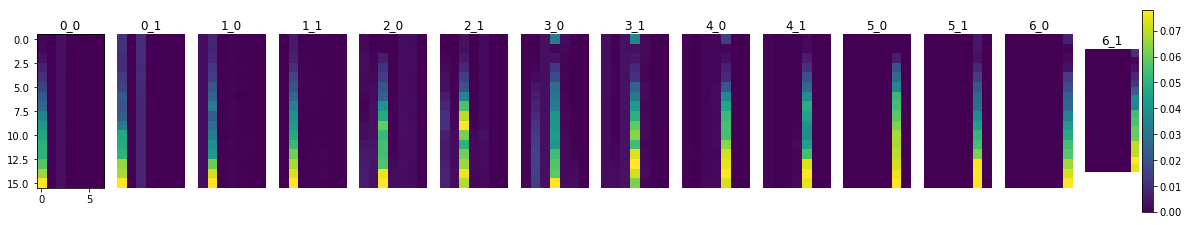

In [150]:
# Each plot is for a different joint movement (7 joints, fwd / back for each)
# The horizontal axis is the joint (7 of them), the vertical axis is the timestep
# The heatmap values show the variance over 10 runs of that joint at that timestep

# A: the most variance is across the joint being moved, and the std is about 4 degrees by end of trajectory

fig, axes = plt.subplots(1, 14, figsize=(20, 5))

for i, k in enumerate(sorted(data.keys())):
    m = np.zeros((10, 16, 7))
    for a, run in enumerate(data[k]):
        for b, timestep in enumerate(run):
            #print(timestep[1])
            m[a, b, :] = timestep[1]
    #print(m[:, 0, :])
    #break
    std = np.sqrt(np.var(m, axis=0))
    #print('max var of {}'.format(k), np.max(std), np.argmax(std))
    #print('median var of {}'.format(k), np.median(std))
    foo = axes[i].imshow(std)
    parts = k.split('_')
    title = '{}_{}'.format(parts[0][-1], parts[2][0])
    axes[i].title.set_text(title)

plt.colorbar(mappable=foo)
for ax in axes[1:]:
    ax.axis('off')

Q2: how much do other joints move when a single joint is moved in isolation?


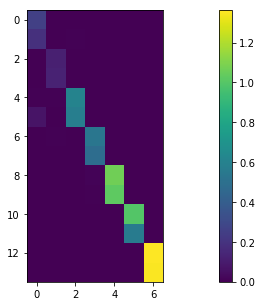

In [160]:
# the x-axis is the joint (7 of them)
# the y-axis is the joint movement (7 joints, fwd / back for each)
# the heatmap value is the median value of in radians of how much the joint moves

# A: joint movement is pretty well isolated to the joint being commanded

fig, axes = plt.subplots(1, 1, figsize=(20, 5))
all_joint_diffs = np.zeros((14, 7))
for i, k in enumerate(sorted(data.keys())):
    m = np.zeros((10, 7))
    for a, run in enumerate(data[k]):
        joint_diff = np.abs(run[-1][1] - run[0][1])
        m[a, :] = joint_diff
    change = np.median(m, axis=0)
    all_joint_diffs[i, :] = change

foo = axes.imshow(all_joint_diffs)
plt.colorbar(mappable=foo)
#axes.axis('off')

Q3: how good is a linear approximation to the dynamics?

[[  1.10513702e+00  -7.36090299e-05   3.04666781e-04   1.92951132e-04
   -3.23707177e-05   5.56815440e-05   1.16161559e-16]
 [  6.14520049e+00  -2.21782097e-02   2.47256957e-01   2.65133224e-01
   -2.72308371e-02   2.99868650e-01  -3.95347835e-14]
 [ -1.48560669e+00   2.19980489e-04   9.34778039e-01   2.29319125e-02
   -1.18487138e-03  -7.07030600e-03  -3.11227583e-15]
 [  1.20378404e+01   2.24407375e-02   2.85322201e-01   5.89953175e-01
   -1.87906575e-02  -5.13008727e-02  -1.81451333e-14]
 [ -8.56729460e+00  -1.24722097e-02  -4.02390762e-01   2.64217310e-01
   -3.97875189e-02  -1.15293224e-02   2.55742661e-14]
 [ -9.51698819e+00   1.94956254e-02  -3.13181648e-01   1.32072182e-02
   -1.81244105e-02   8.83410720e-01   2.86211908e-15]
 [ -4.14601133e-01  -4.76430863e-02  -2.54497650e-03   4.32209688e-02
    3.89886205e-03   2.04162137e-02   1.52142517e-03]
 [  1.06212238e+01   1.22051737e+00   6.51970362e-02  -1.10723186e+00
   -9.98807847e-02  -5.23021184e-01  -3.89757673e-02]
 [  0.00

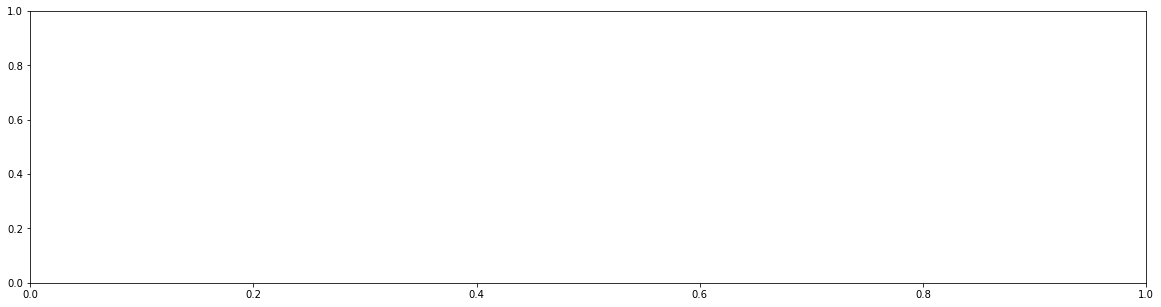

In [170]:
# for each motion, fit a linear model to the dynamics for all the joints

fig, axes = plt.subplots(1, 1, figsize=(20, 5))
for i, k in enumerate(sorted(data.keys())):
    joint_data = np.zeros((10, 16, 7))
    next_joint_data = np.zeros((10, 16, 7))
    torque_data = np.zeros((10, 16, 7))
    for a, run in enumerate(data[k]):
        for b, timestep in enumerate(run):
            joint_data[a, b, :] = timestep[1]
            next_joint_data[a, b, :] = timestep[1]
            torque_data[a, b, :] = timestep[0] 
    # handle beg and end
    joint_data = joint_data[:, :-1, :]
    next_joint_data = next_joint_data[:, 1:, :]
    torque_data = torque_data[:, 1:, :]
    
    # reshape data into data-pts x feature
    joint_data = joint_data.reshape((150, 7))
    next_joint_data = next_joint_data.reshape((150, 7))
    torque_data = torque_data.reshape((150, 7))